In [24]:
# cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Cleaned-students_adaptability_level_online_education.csv to Cleaned-students_adaptability_level_online_education (4).csv


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [25]:
print("✔ Shape:", df.shape)
print("\n✔ Info:")
df.info()

print("\n✔ Summary Statistics:")
df.describe(include='all')


✔ Shape: (256, 14)

✔ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               256 non-null    object
 1   Age                  256 non-null    object
 2   Education Level      256 non-null    object
 3   Institution Type     256 non-null    object
 4   IT Student           256 non-null    object
 5   Location             256 non-null    object
 6   Load-shedding        256 non-null    object
 7   Financial Condition  256 non-null    object
 8   Internet Type        256 non-null    object
 9   Network Type         256 non-null    object
 10  Class Duration       256 non-null    object
 11  Self Lms             256 non-null    object
 12  Device               256 non-null    object
 13  Adaptivity Level     256 non-null    object
dtypes: object(14)
memory usage: 28.1+ KB

✔ Summary Statistics:


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,256,256,256,256,256,256,256,256,256,256,256,256,256,256
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,148,101,121,152,178,182,202,183,138,161,163,198,207,118


In [26]:
for col in num_cols:
    print("\nCOLUMN:", col)
    print(df[col].astype(str).unique()[:30])


COLUMN: Age
['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']

COLUMN: Load-shedding
['Low' 'High']

COLUMN: Class Duration
['3-6' '1-3' '0']

COLUMN: Adaptivity Level
['Moderate' 'Low' 'High']


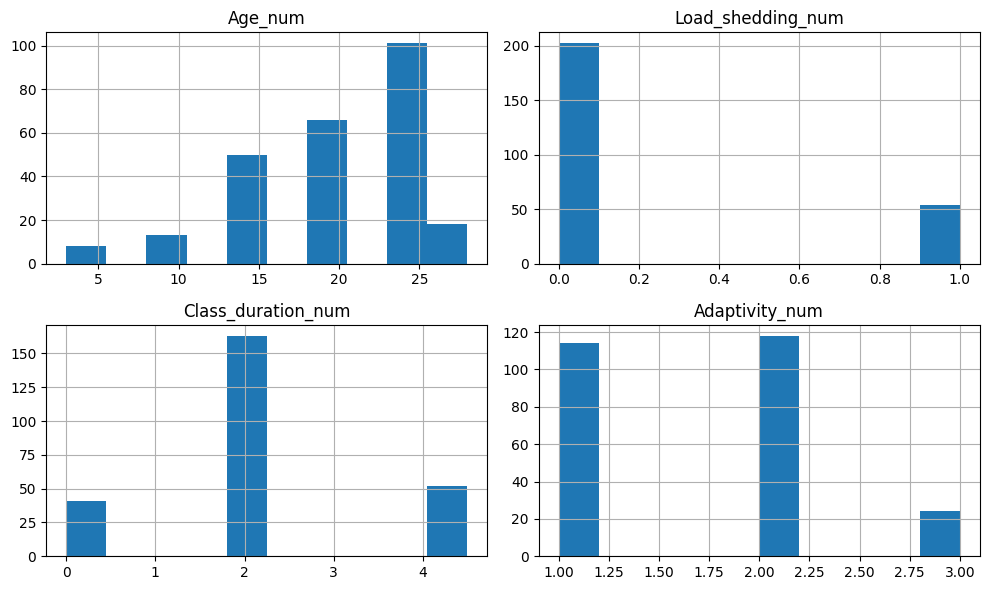

In [31]:
import numpy as np

# -----------------------
# 1. Convert AGE (ranges → midpoint)
# -----------------------
def midpoint_range(value):
    if "-" in value:
        a, b = value.split("-")
        return (float(a) + float(b)) / 2
    else:
        return float(value)

df["Age_num"] = df["Age"].apply(midpoint_range)

# -----------------------
# 2. Load-shedding (Low/High)
# -----------------------
mapping_load = {"Low": 0, "High": 1}
df["Load_shedding_num"] = df["Load-shedding"].map(mapping_load)

# -----------------------
# 3. Class Duration (ranges → midpoint)
# -----------------------
df["Class_duration_num"] = df["Class Duration"].apply(midpoint_range)

# -----------------------
# 4. Adaptivity Level (ordered scale)
# -----------------------
mapping_adapt = {"Low": 1, "Moderate": 2, "High": 3}
df["Adaptivity_num"] = df["Adaptivity Level"].map(mapping_adapt)

num_cols = ["Age_num", "Load_shedding_num", "Class_duration_num", "Adaptivity_num"]

df[num_cols].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


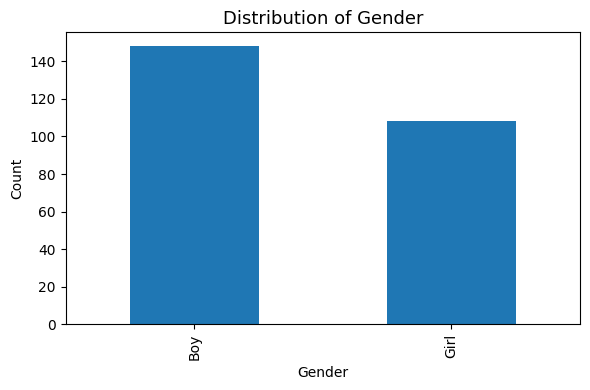

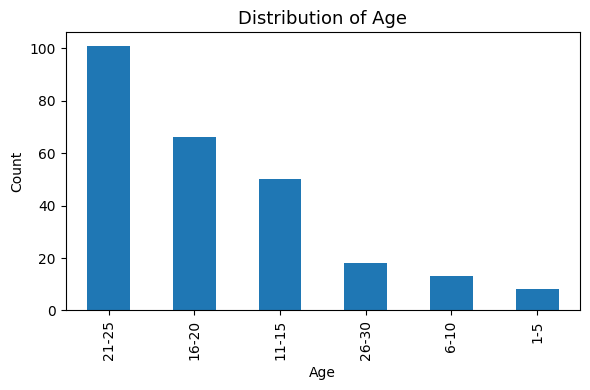

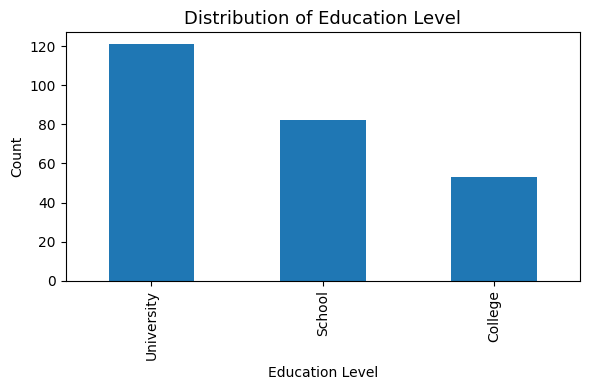

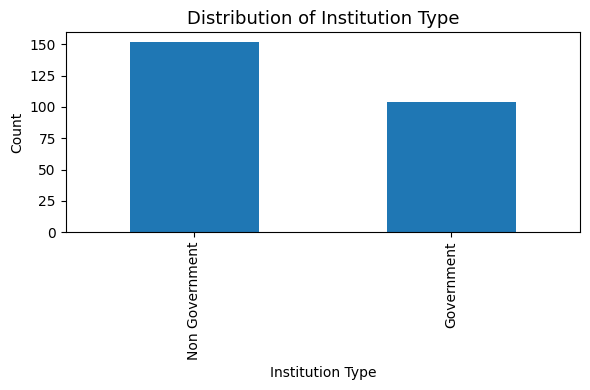

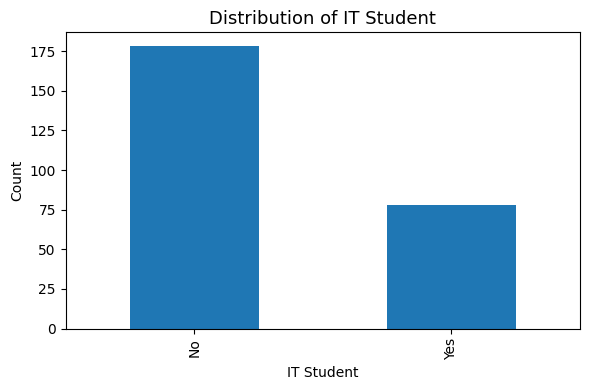

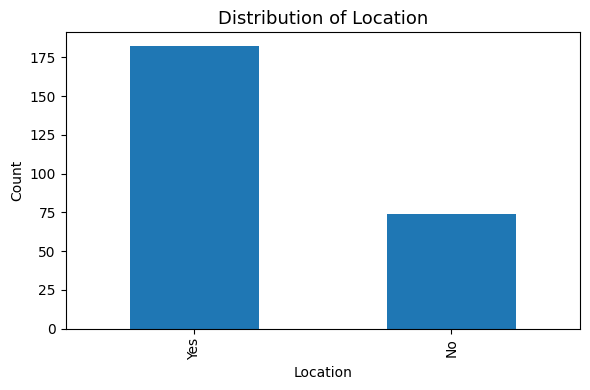

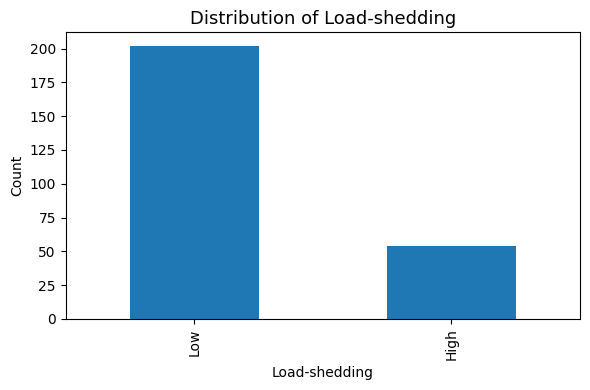

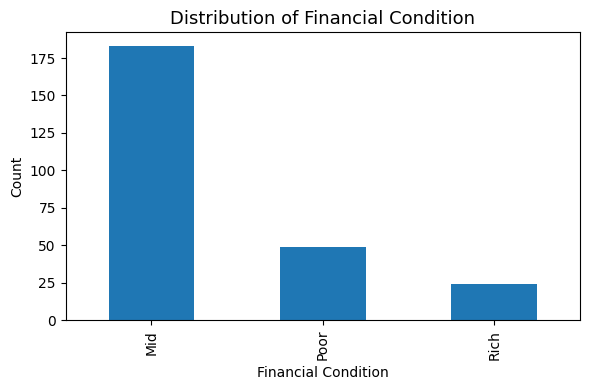

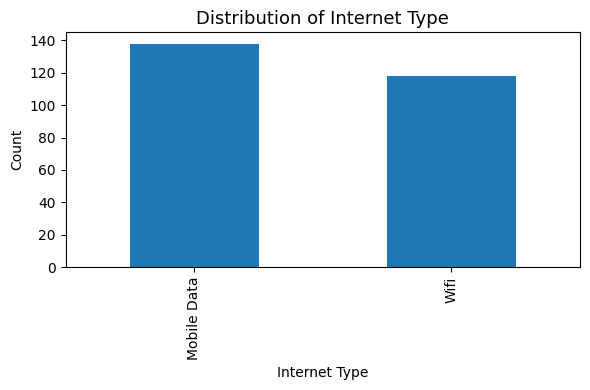

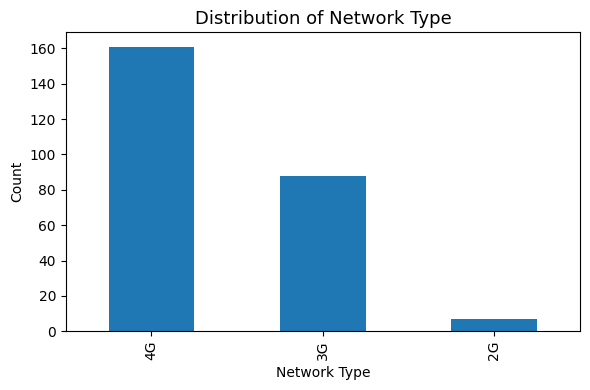

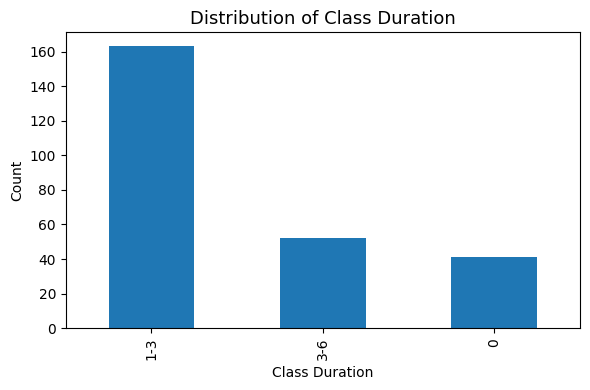

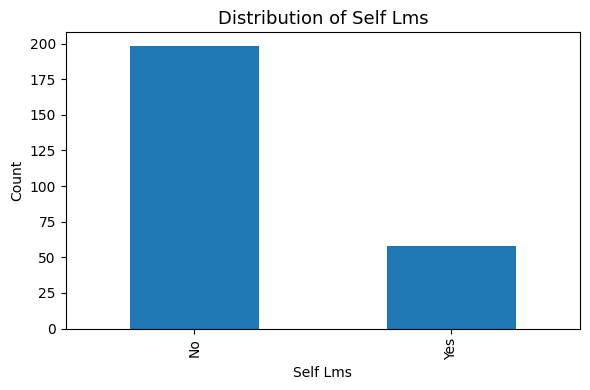

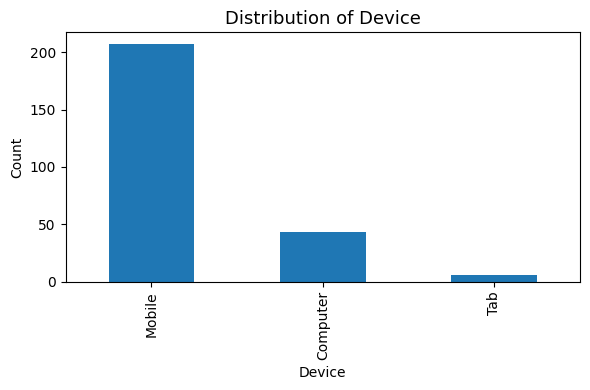

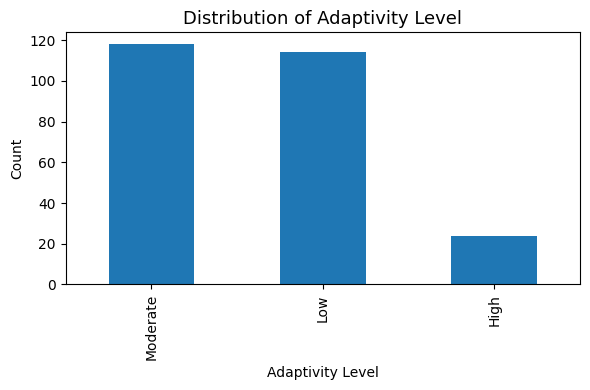

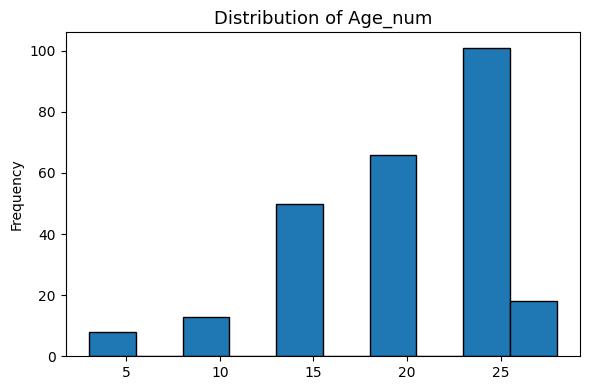

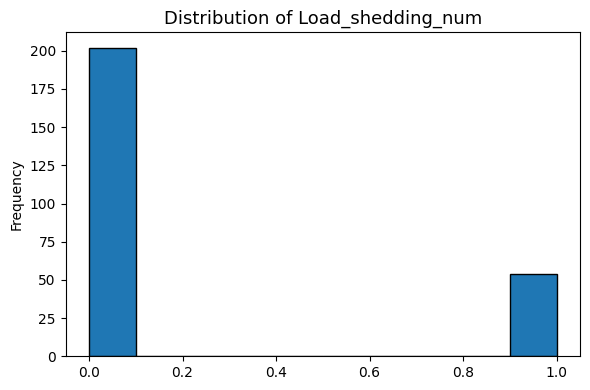

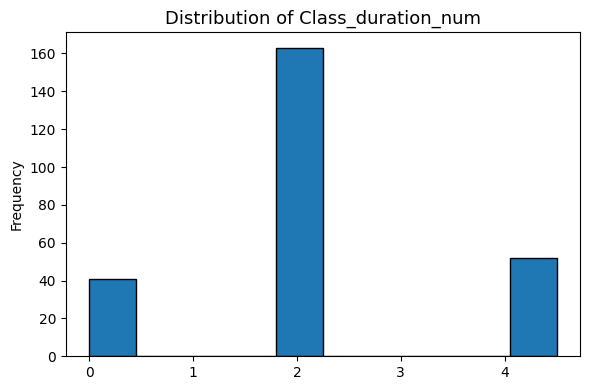

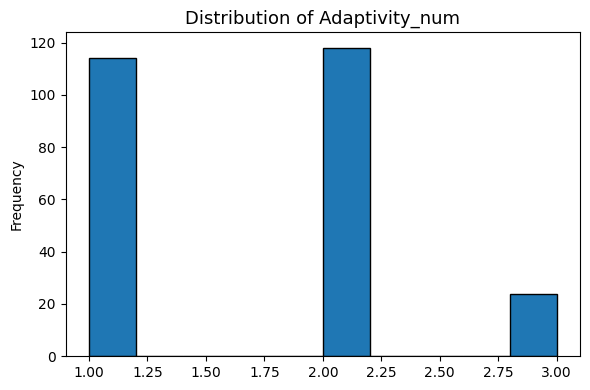

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Automatically detect columns
for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.title(f"Distribution of {col}", fontsize=13)

    # Check the data type
    if df[col].dtype == 'object':
        # Categorical → bar chart
        df[col].value_counts(dropna=False).plot(kind='bar')
        plt.ylabel("Count")

    else:
        # Numeric → histogram
        df[col].dropna().plot(kind='hist', bins=10, edgecolor='black')
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
